In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
appliance = {
    'WashingMachine': [0, 1250],
    'Fridge':         [1550, 3600],  # 1550, 3600
    'Kettle':         [3700, 4200],
    'Microwave':      [28700, 28800],
    'Dishwasher':     [7410, 8710]
}

def file_filter(f):
    if f[-4:] in ['.npy']:
        return True
    else:
        return False

def NILMPLOT(folder, model):
    files = os.listdir(folder)
    files = sorted(list(filter(file_filter, files)))
    for i_npy in files:
        
        if i_npy.split('_')[0] == 'results':
            # print('====> Save ALL')
            break

        app_name = i_npy.split('_')[-1].split('.')[0]

        dis_path = os.path.join(folder, i_npy)
        
        load_npy = np.load(dis_path)

        x_total       = load_npy[0].reshape(-1)
        y_total_pred  = load_npy[1].reshape(-1)
        y_total_true  = load_npy[2].reshape(-1)
        start = appliance[app_name][0]
        end = appliance[app_name][1]
        # plt.plot(x_total[start:end], label='input')
        plt.figure(figsize=(6, 1.5))
        plt.plot(y_total_true[start:end], label='GroundTruth', linewidth=2.)
        plt.plot(y_total_pred[start:end], label=model, linestyle='--', linewidth=2.)
        plt.legend(loc='upper right', prop = {'size':12})
        plt.xticks([])
        plt.yticks([])
        # plt.title(app_name)
        print(app_name)
        # plt.savefig(os.path.join(folder, i_npy[:-4]) + '.png')
        plt.show()
        plt.close()

     Appliance           MAE         MAE_on        EpD           PR           RE           F1          Acc          SAE          RMSE         EAC          NDE     
   WashingMachine      9.830870    106.903592   75.112099     0.860214     0.928621     0.893109     0.988294     0.023411    72.675902     0.901497     0.067351  
     Dishwasher        3.407816    49.113050    68.543074     0.997568     0.876685     0.933228     0.966168     0.067663    64.794104     0.957874     0.046722  
       Kettle          2.067542    123.101781   28.277449     0.993503     0.928256     0.959772     0.975925     0.048150    53.372496     0.956387     0.050929  
       Fridge          5.592351     9.637213    70.033347     0.965928     0.937204     0.951349     0.962774     0.074451    19.215877     0.926786     0.094205  
     Microwave         3.063092    227.731492   27.788446     0.894600     0.884813     0.889680     0.961520     0.076961    54.177754     0.876859     0.155531  
      Average   

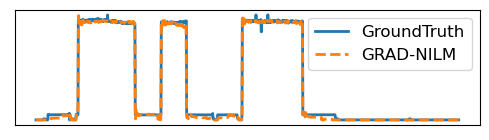

Fridge


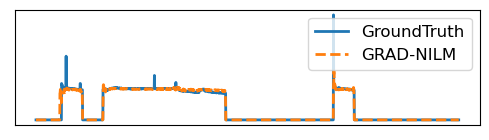

Kettle


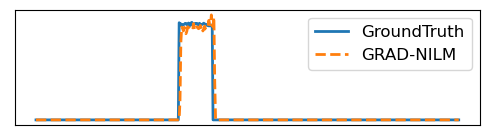

Microwave


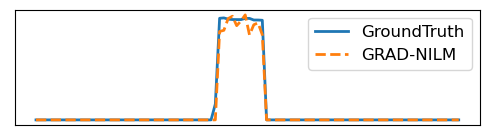

WashingMachine


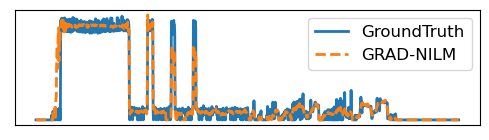

In [3]:
## 真实数据集
path = './'
a0 = a1 = a2 = a3 = a4 = a5 = a6 = a7 = a8 = a9 = a10 = 0
e = 0
print('{:^20s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s} {:^12s}'.format('Appliance','MAE', 'MAE_on', 'EpD', 'PR', 'RE', 'F1', 'Acc', 'SAE', 'RMSE', 'EAC', 'NDE'))
for index_app, test_app in enumerate(['WashingMachine', 'Dishwasher', 'Kettle', 'Fridge', 'Microwave']):
    app = np.load(os.path.join(path, f'results_median_{test_app}.npy'), allow_pickle=True)
    print('{:^20s} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f}'.format(test_app, app[0][e], app[1][e], app[2][e][0], app[3][e],\
                                         app[4][e], app[5][e], app[6][e], app[7][e], app[8][e], app[9][e], app[10][e]))
    a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10 = a0 + app[0][e], a1 + app[1][e], a2 + app[2][e][0], a3 + app[3][e], a4 + app[4][e], a5 + app[5][e], a6 + app[6][e], a7 + app[7][e], a8 + app[8][e], a7 + app[9][e], a7 + app[10][e]
print('{:^20s} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f} {:^12f}'.format('Average', a0/5,a1/5,a2/5,a3/5,a4/5,a5/5,a6/5,a7/5,a8/5,a9/5,a10/5))
NILMPLOT(path, 'GRAD-NILM')